In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from numpy import random as rd
from igraph import Graph, plot, ALL
import numpy as np

from graph_helper import GraphHelper

from agents.greedy import NaiveAgent, DSaturAgent

rd.seed(0)

In [107]:
from matplotlib.artist import Artist
from igraph import BoundingBox, Graph, palettes

class GraphArtist(Artist):
    """Matplotlib artist class that draws igraph graphs.
    Only Cairo-based backends are supported.
    """

    def __init__(self, graph, figsize, palette=None, *args, **kwds):
        """Constructs a graph artist that draws the given graph within
        the given bounding box.

        `graph` must be an instance of `igraph.Graph`.
        `bbox` must either be an instance of `igraph.drawing.BoundingBox`
        or a 4-tuple (`left`, `top`, `width`, `height`). The tuple
        will be passed on to the constructor of `BoundingBox`.
        `palette` is an igraph palette that is used to transform
        numeric color IDs to RGB values. If `None`, a default grayscale
        palette is used from igraph.

        All the remaining positional and keyword arguments are passed
        on intact to `igraph.Graph.__plot__`.
        """
        Artist.__init__(self)

        if not isinstance(graph, Graph):
            raise TypeError("expected igraph.Graph, got %r" % type(graph))

        self.graph = graph
        self.palette = palette or palettes["gray"]
        self.figsize = figsize
        self.args = args
        self.kwds = kwds

    def draw(self, renderer):
        from matplotlib.backends.backend_cairo import RendererCairo
        if not isinstance(renderer, RendererCairo):
            raise TypeError("graph plotting is supported only on Cairo backends")
            
        self.graph.__plot__(renderer.gc.ctx, BoundingBox(60 * self.figsize[0] // 6, 60 * self.figsize[1] // 8, 600 * self.figsize[0] // 12, 600 * self.figsize[1] // 12 ), self.palette, *self.args, **self.kwds)

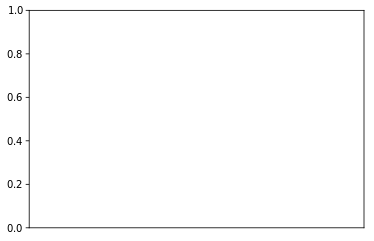

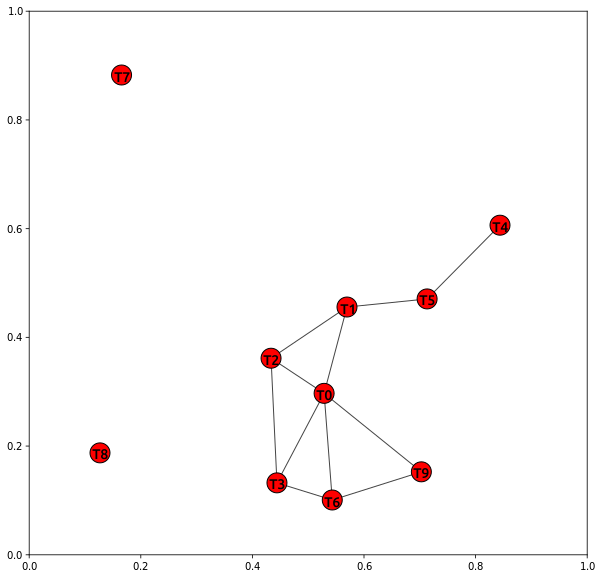

In [116]:
import math
import matplotlib
matplotlib.use("cairo")

figsize=(10, 10)

# Create the figure
plt.gca().xaxis.set_major_locator(plt.NullLocator())
fig = plt.figure(figsize=figsize)
axes = fig.add_subplot(111)
graph_artist = GraphArtist(g, figsize)
axes.artists.append(graph_artist)

In [4]:
data = [[rd.rand(), rd.rand()] for i in range(10)]

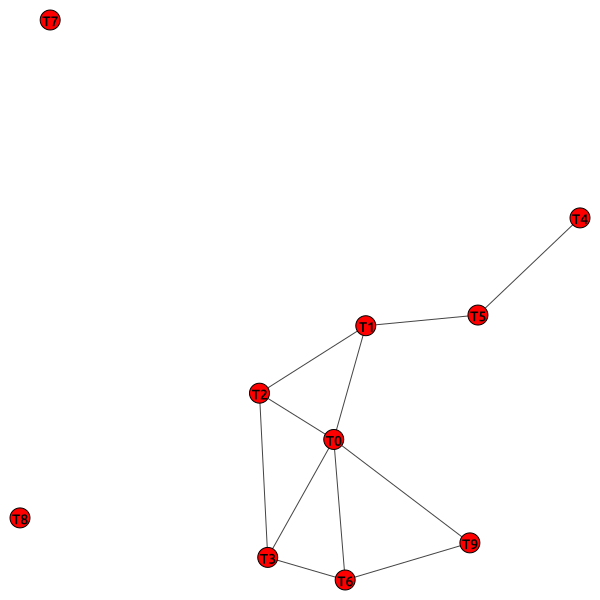

In [5]:
naive = NaiveAgent(data, 0.3)
dSatur = NaiveAgent(data, 0.3)

g = naive.get_graph()
plot(g)

In [6]:
print(sa.solve())
g = sa.get_graph()
plot(g)

NameError: name 'sa' is not defined

In [ ]:
adj = g.get_adjacency()
a = np.asarray(list(adj))
a

In [ ]:
g.get_adjlist(mode=ALL)

In [ ]:
sa.distances()